# Data Story: Exploring Telco's Customer Churn & Retention 
Telco is a telecommunications company that offers a myriad of base and bonus packages surrounding their phone and Internet services.  With the increasing competitive offerings from other smartphone and streaming service providers contributing to the growing industry cord-cutting and churn, Telco is interested in better serving and retaining its current and churned customers by understanding their account activity, demogrpahic profiles and services purchased.  

With such information the telcom provider expects to predict the customer behaviors and/or characteristics that leads to churn and thus proactively work to put in place customer programs and packages that will better retain and upsale more current & future customers amidst the growing competitive marketplace.

However, before moving forward with implementing any changes to improve customer churn and retention, Telco would like to be informed of the following:
+ What was their latest customer churn & retention rates and composition?
+ To what extent was Telco's revenue impacted by its latest churned customers?
+ Were their most or least tenured customers leaving or some combination of both?
+ Was there relationship between the level of services purchased and customer tenure?
+ Was there a particular demographic profile and/or characteristic more likely to churn?

# Load the cleaned dataset 
Before starting any exploratory analysis, we will load the previous notebook in which Telco's data was wrangled and cleaned for ease of use.

In this dataset, the following customer information was provided and defined by the telecom provider:

+ __Demographic info about customers:__ gender, age range, and if they have partners and dependents
+ __Services purchased:__ phone, multiple lines, Internet, online security, online backup, device protection, tech support, and streaming TV and movies
+ __Customer account information:__ how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
+ __Churn:__ customers who left within the last month
+ __Tenure:__ number of consecutive months customers were or continue to be on contract

In [1]:
# Load clean and data-wrangled dataset from previous notebook
%run '/Users/sergiogutierrez/Springboard_projects/Capstone 1/Data Wrangling Telco Data Science Capstone Project.ipynb'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [2]:
# Check DataFrame with categorical binary columns
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No_phone_service,...,StreamingTV_Yes,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_One_year,Contract_Two_year,PaperlessBilling_Yes,PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [3]:
# Load visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set_palette('Set2')

# What was their latest customer churn & retention rates and composition?
Based on this month's customer composition chart below, Telco lost a little over a quarter of its customer base, which amounted to 26.5% (or approximately 1,900) of its total customers.  This appears to be a substantial amount of lost customers but we also need to assess the importance of these lost customers as it relates to their revenue contribution, tenure (or number of months under contract) with the provider, and the extent to which their churn in the industry is within the norm and being replenished with new customers.

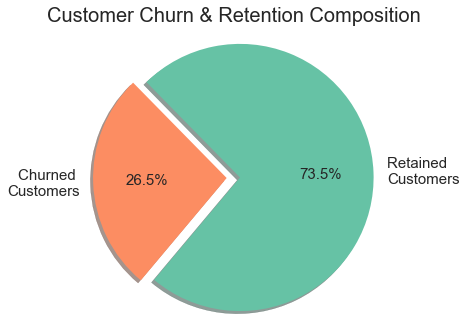

In [4]:
churn_rate = df.Churn_Yes.value_counts()

plt.pie(churn_rate, labels=('Retained \nCustomers', 'Churned \nCustomers'), textprops={'fontsize': 15}, 
        autopct='%1.1f%%', shadow=True, explode=(0, 0.1), startangle=230)
plt.title("Customer Churn & Retention Composition", size=20)
plt.axis('equal')

plt.show()

# To what extent was Telco's revenue impacted by its churned customers?
As we look to evaluate the revenue contribution from churned customers for this month, the breakdown below illustrates that its churned customers comprise of 18% (or close to 2.9 million dollars) of its total revenue, while its retained customers contribute the remaining 82% (or 13.2 million dollars) of the company's revenue.  While Telco's churned customers comprise of 26.5% of total customers, the telecom provider's revenue losses from them are not equally impacted since their revenue contribution percentage is less than their customer composition percentage.  

Additionally, the average revenue contribution from churned customers was almost 60% lower than the average revenue contribution from retained customers.  While Telco is concerned with focusing on churn, the provider should acknowledge the value and importance of its retained customers as they are majority revenue contributors.  Thus, any changes or improvements to policies and programs should not affect or harm its retained and most loyal customer base.

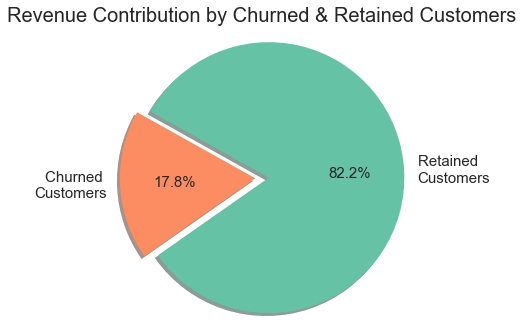

avg churned customer total charge = 1531.8
avg retained customer total charge = 2555.34


In [5]:
churned_revenue = df.loc[df.Churn_Yes==1, 'TotalCharges']
retained_revenue = df.loc[df.Churn_Yes==0, 'TotalCharges']

plt.pie((retained_revenue.sum(), churned_revenue.sum()), labels=('Retained \nCustomers', 'Churned \nCustomers'), textprops={'fontsize': 15}, 
        autopct='%1.1f%%', shadow=True, explode=(0, 0.1), startangle=215)
plt.title("Revenue Contribution by Churned & Retained Customers", size=20)
plt.axis('equal')

plt.show()
print('avg churned customer total charge =',str(np.round(np.mean(churned_revenue), decimals=2)))
print('avg retained customer total charge =',str(np.round(np.mean(retained_revenue), decimals=2)))

# Were their most or least tenured customers leaving or a combination of both?
Based on the charted results below, the least tenured of the churned customers were leaving Telco, with over 50% of the these customers being contracted 12 or fewer months with the telecom provider.  However, we see that the remaining percent of churned customers are spread out, even with some reaching 60 to 72 months (5 to 6 years) with the provider. Since overall trend is that customer tenure tends to tail off after 1 year of service, Telco needs to better understand the level of services purchased by the customers churning within a year or less.

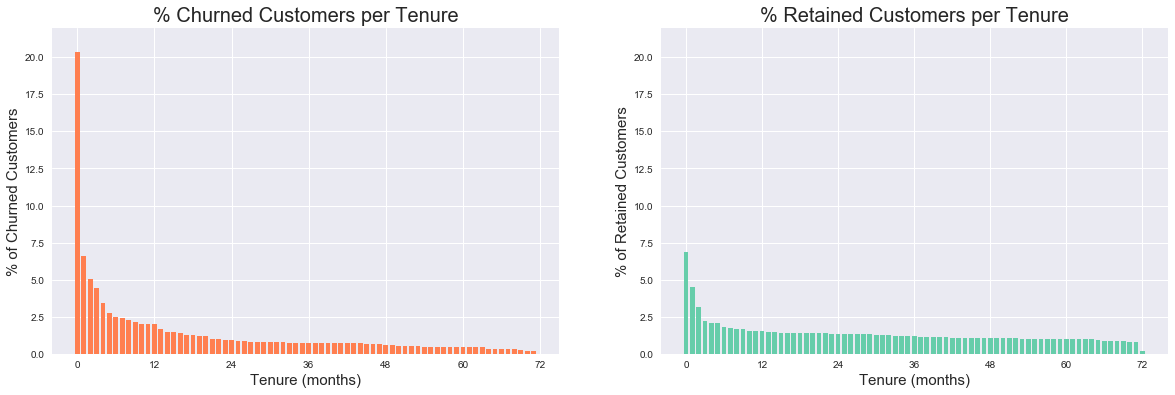

In [6]:
churned_tenure = df.loc[df.Churn_Yes==1, 'tenure'].value_counts()
retained_tenure = df.loc[df.Churn_Yes==0, 'tenure'].value_counts()
pos1 = list(range(len(churned_tenure))) 
pos2 = list(range(len(retained_tenure)))
width = 0.75

fig, ax = plt.subplots(1, 2, figsize=(20,6))

ax[0].set_title('% Churned Customers per Tenure', size=20)
ax[0].bar(pos1, churned_tenure/churned_tenure.sum()*100, width, color='coral')
ax[0].set_xticks(np.arange(0, 84, 12))
ax[0].set_xlabel('Tenure (months)', size=15)
ax[0].set_ylabel('% of Churned Customers', size=15)
ax[0].set_ylim(0, 22)
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax[1].set_title('% Retained Customers per Tenure', size=20)
ax[1].bar(pos2, retained_tenure/retained_tenure.sum()*100, width, color='mediumaquamarine')
ax[1].set_xticks(np.arange(0, 84, 12))
ax[1].set_xlabel('Tenure (months)', size=15)
ax[1].set_ylabel('% of Retained Customers', size=15)
ax[1].set_ylim(0, 22)
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%1.1f'))

plt.show()

# Was there relationship between the level of services purchased and  tenure?
When looking at relationship between monthly charges and tenure (pictured below in the first scatterplot), we can see there doesn't appear to be relationship between the two, especially without any directional sign of a positive or negative relationship.  However, when we look at the relationship between total charges and tenure (pictured in the second scatterplot), we can readily see there is a positive relationship between the two variables.

In this second plot we can see that customers that have spent more money with Telco over time were more likelier to be retained as a customer.  This means customers that purchased more services and add-ons (i.e., phone, Internet, streaming, tech support, etc.) and/or were upsold per contractual period were more likely to stay with Telco. Thus, Telco can reduce the churn by ensuring it packages as many services and add-ons as possible for new customers, and periodical attempting to upsell its existing customers with services or add-ons they do not purchase.  Nevertheless, Telco needs to better understand the demographic profile and characteristics of its churned customers.

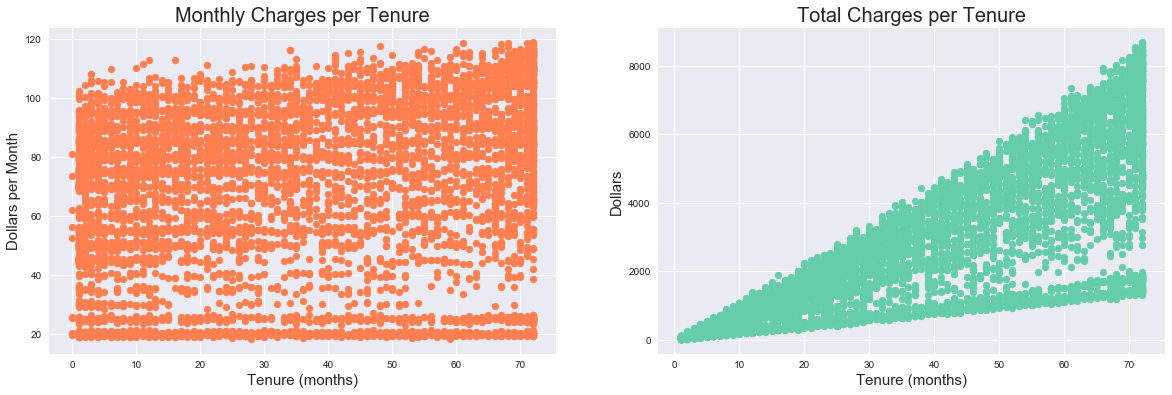

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))

ax[0].set_title('Monthly Charges per Tenure', size=20)
ax[0].scatter(x='tenure', y='MonthlyCharges', data=df, color='coral')
ax[0].set_xlabel('Tenure (months)', size=15)
ax[0].set_ylabel('Dollars per Month', size=15)

ax[1].set_title('Total Charges per Tenure', size=20)
ax[1].scatter(x='tenure', y='TotalCharges', data=df, color='mediumaquamarine')
ax[1].set_xlabel('Tenure (months)', size=15)
ax[1].set_ylabel('Dollars', size=15)

plt.show()

# Was there a demographic profile and/or characteristic more likely to churn?
As we survey the histograms below comparing retained versus churned customers, several demographic profile conclusions can be inferred.  First, churned customers were equally male and female, with no particular skew toward a gender.  Moving to the next chart comparing senior citizens with non-senior citizens, it appears senior citizens were more likely to churn than non-senior citizens, percentage-wise that is. This is likely due to the fact that senior citizens are shifting to cellphones inplace of landline services, and are less likely to use Internet or streaming services.  Or it could simply be due to the fact that the number of senior citizen is low (see actuals below) so any churn will look big percentage-wise.

Moving on to parter versus no partner churned customers, it seems that customers with no partners are more likely to churn.  This is likely driven by the fact that customers without partners have less financial support, and thus are more likely to churn as customers.  Lastly, moving onto to the dependents histogram, it seems that customers without dependents are likelier to churn than customers with.  This is likely tied with the no partners comparisons as customers with dependents are likely family households with partners that can provide financial support and/or simply require such services, especially Internet for the students.  Like the previous histograms and observations, more data will require to prove these hypotheses.

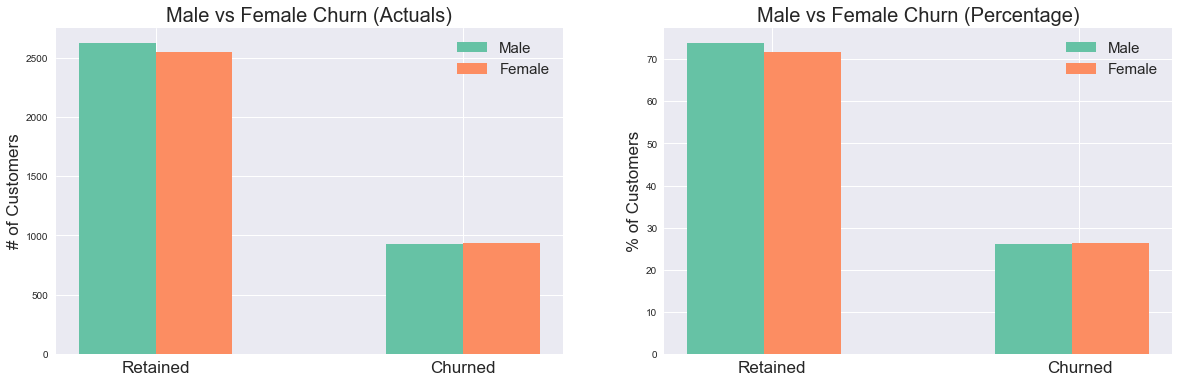

In [8]:
male_churn = df.loc[df.gender_Male==1, 'Churn_Yes']
female_churn = df.loc[df.gender_Male==0, 'Churn_Yes']
per_male_churn = male_churn.value_counts() / len(male_churn)*100
per_female_churn = female_churn.value_counts() / len(male_churn)*100

fig, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].hist((male_churn, female_churn), bins=np.arange(3)-0.5, rwidth=0.5, label=('Male', 'Female'))
ax[0].set_title('Male vs Female Churn (Actuals)', size=20)
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(('Retained', 'Churned'), size=17)
ax[0].set_ylabel('# of Customers', size=17)
ax[0].margins(0.05)
ax[0].legend(fontsize=15)

n_groups = 2
index = np.arange(n_groups)
bar_width=0.25
ax[1].bar(index, per_male_churn, bar_width, label='Male')
ax[1].bar(index + bar_width, per_female_churn, bar_width, label='Female')
ax[1].set_title('Male vs Female Churn (Percentage)', size=20)
ax[1].set_xticks(index + 0.15)
ax[1].set_xticklabels(['Retained', 'Churned'], size=17)
ax[1].set_ylabel('% of Customers', size=17)
ax[1].legend(fontsize=15)

plt.show()

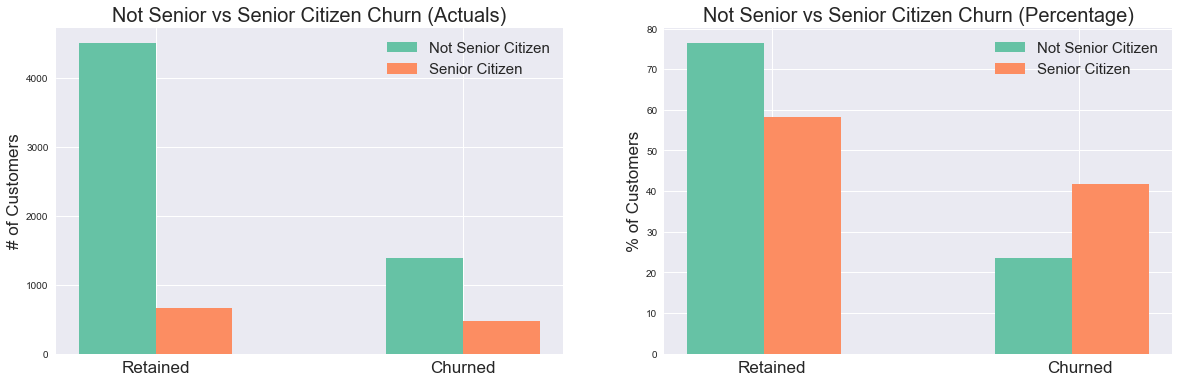

In [9]:
senior_churn = df.loc[df.SeniorCitizen==1, 'Churn_Yes']
not_senior_churn = df.loc[df.SeniorCitizen==0, 'Churn_Yes']
per_senior_churn = senior_churn.value_counts() / len(senior_churn)*100
per_not_senior_churn = not_senior_churn.value_counts() / len(not_senior_churn)*100

fig, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].hist((not_senior_churn, senior_churn), bins=np.arange(3)-0.5, rwidth=0.5, label=('Not Senior Citizen', 'Senior Citizen'))
ax[0].set_title('Not Senior vs Senior Citizen Churn (Actuals)', size=20)
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(('Retained', 'Churned'), size=17)
ax[0].set_ylabel('# of Customers', size=17)
ax[0].margins(0.05)
ax[0].legend(fontsize=15)

ax[1].bar(index, per_not_senior_churn, bar_width, label='Not Senior Citizen')
ax[1].bar(index + bar_width, per_senior_churn, bar_width, label='Senior Citizen')
ax[1].set_title('Not Senior vs Senior Citizen Churn (Percentage)', size=20)
ax[1].set_xticks(index + 0.15)
ax[1].set_xticklabels(['Retained', 'Churned'], size=17)
ax[1].set_ylabel('% of Customers', size=17)
ax[1].legend(fontsize=15)

plt.show()

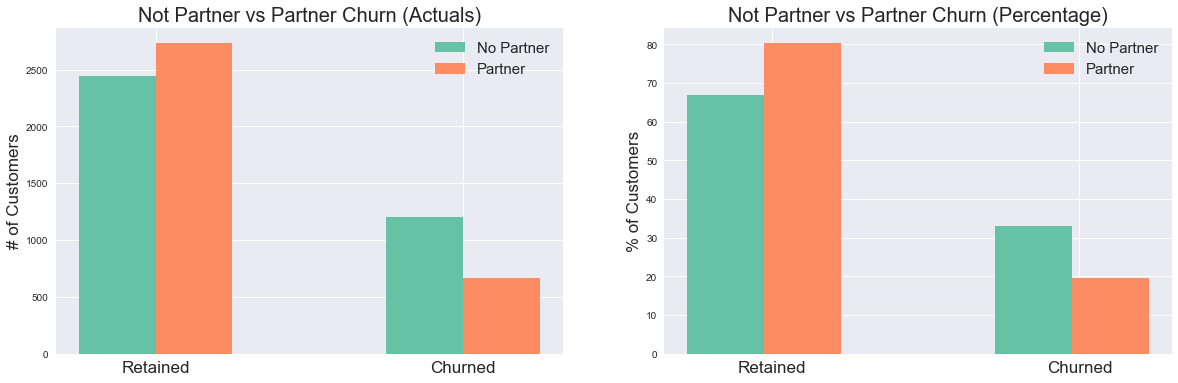

In [10]:
partner_churn = df.loc[df.Partner_Yes==1, 'Churn_Yes']
no_partner_churn = df.loc[df.Partner_Yes==0, 'Churn_Yes']
per_partner_churn = partner_churn.value_counts() / len(partner_churn)*100
per_no_partner_churn = no_partner_churn.value_counts() / len(no_partner_churn)*100

fig, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].hist((no_partner_churn, partner_churn), bins=np.arange(3)-0.5, rwidth=0.5, label=('No Partner', 'Partner'))
ax[0].set_title('Not Partner vs Partner Churn (Actuals)', size=20)
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(('Retained', 'Churned'), size=17)
ax[0].set_ylabel('# of Customers', size=17)
ax[0].margins(0.05)
ax[0].legend(fontsize=15)

ax[1].bar(index, per_no_partner_churn, bar_width, label='No Partner')
ax[1].bar(index + bar_width, per_partner_churn, bar_width, label='Partner')
ax[1].set_title('Not Partner vs Partner Churn (Percentage)', size=20)
ax[1].set_xticks(index + 0.15)
ax[1].set_xticklabels(['Retained', 'Churned'], size=17)
ax[1].set_ylabel('% of Customers', size=17)
ax[1].legend(fontsize=15)

plt.show()

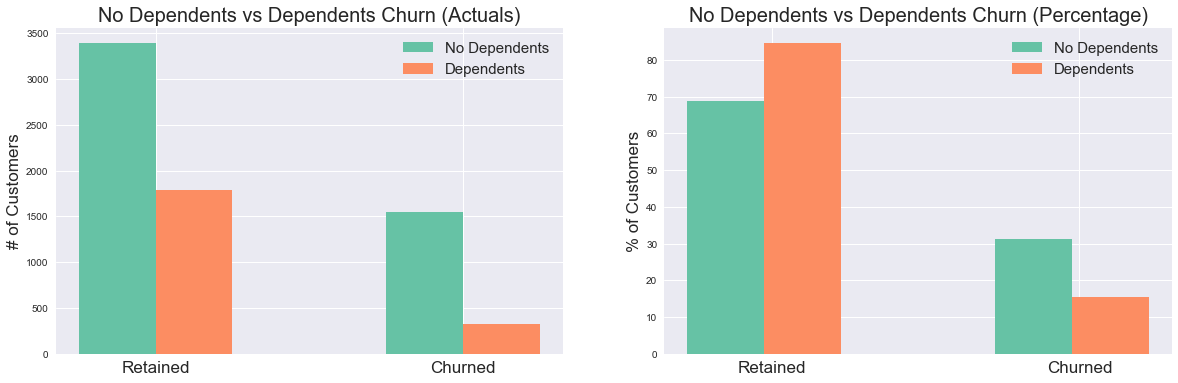

In [11]:
dependents_churn = df.loc[df.Dependents_Yes==1, 'Churn_Yes']
no_dependents_churn = df.loc[df.Dependents_Yes==0, 'Churn_Yes']
per_dependents_churn = dependents_churn.value_counts() / len(dependents_churn)*100
per_no_dependents_churn = no_dependents_churn.value_counts() / len(no_dependents_churn)*100

fig, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].hist((no_dependents_churn, dependents_churn), bins=np.arange(3)-0.5, rwidth=0.5, label=('No Dependents', 'Dependents'))
ax[0].set_title('No Dependents vs Dependents Churn (Actuals)', size=20)
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(('Retained', 'Churned'), size=17)
ax[0].set_ylabel('# of Customers', size=17)
ax[0].margins(0.05)
ax[0].legend(fontsize=15)

ax[1].bar(index, per_no_dependents_churn, bar_width, label='No Dependents')
ax[1].bar(index + bar_width, per_dependents_churn, bar_width, label='Dependents')
ax[1].set_title('No Dependents vs Dependents Churn (Percentage)', size=20)
ax[1].set_xticks(index + 0.15)
ax[1].set_xticklabels(['Retained', 'Churned'], size=17)
ax[1].set_ylabel('% of Customers', size=17)
ax[1].legend(fontsize=15)

plt.show()